# **General Question**

## **Context**
1. Bagaimana konteks bisnis berdasarkan dengan data yang telah diberikan? Silahkan
buat asumsi atau penamaan jika diperlukan.

Dari data yang saya dapat, saya mendapatkan data produk yang berisikan penjualan bahan makanan. dari tabel tersebut terdapat kolom :
ProductID, ProductName,SupplierID,CategoryID, QuantityPerUnit,UnitPrice, UnitsInStock, UnitsOnOrder, ReorderLevel, Discontinued.
Perusahaan ini ingin mengetahui seberapa banyak penjualan dari tiap produk mereka yang terjual paling banyak.


## **Database Information**
2. Ada berapa banyak tabel yang disediakan oleh database yang tersedia? Jabarkan
setiap tabelnya. Jika terdapat ERD, silahkan ditampilkan.

Data Source : Northwind

Terdapat 13 Tabel di Database tersebut yang berisikan :
1. Categories : Menyimpan kategory makanan pada tiap produk 
2. Customercustomerdemo : Tidak ada isi (Hanya ada Tabel nya saja)
3. Customerdemographics : Tidak ada isi (Hanya ada Tabel nya saja)
4. Customers : Menyimpan informasi data customers
5. Employees : Menyimpan informasi data Employees
6. Employeeterritories : Menyimpan informasi wilayah karyawan
7. Orderdetail : Menyimpan detail dari setiap pesanan yang dilakukan oleh pelanggan.
8. Orders : Menyimpan informasi jual-beli yang dilakukan oleh pelanggan.
9. Products : Menyimpan informasi tentang jenis produk Makanan
10. Region : Menyimpan informasi 4 Region
11. Shippers : Menyimpan Informasi mengenai Jasa pengiriman produk
12. Suplliers : Menyimpan informasi mengenai data supplier
13. Territories : Menyimpan detail wilayah

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.

# **DATABASE**

## **Connection to Database**

Bagian ini merupakan langkah awal untuk mulai melakukan proses analisis data. Pertama adalah membuat koneksi ke database di mana seperti yang sudah dijelaskan sebelumnya, database yang akan digunakan adalah database ``Northwind``. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database.

In [1]:
#Import modules

import pandas as pd
import numpy as np
import mysql.connector as sqlcon

In [2]:
# Connect to database

mydb = sqlcon.connect(
    host ='localhost',
    user = 'root',
    passwd = 'pass1234$$',
    database = 'Northwind'
)

Selain melakukan koneksi ke database, hal lain yang perlu dilakukan pada bagian awal ini adalah membuat sebuah fungsi untuk menuliskan ``query`` yang kemudian akan disimpan dalam bentuk DataFrame. Tujuannya adalah agar data hasil ``query`` yang dibuat dapat disimpan dan digunakan untuk keperluan analisis data.

In [3]:
# Query Function
curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

In [4]:
tabel1 = sql_table (
    '''
select p.ProductID, p.ProductName, p.SupplierID, p.CategoryID, p.QuantityPerUnit, p.UnitPrice, p.UnitsInStock, p.ReorderLevel, c.CategoryName, od.OrderID, od.Quantity, od.UnitPrice, ShipCountry
from products p
left join orderdetails od on p.ProductID = od.ProductID
left join categories c on p.CategoryID = c.CategoryID
left join orders o on od.OrderID = o.OrderID
    '''
)
tabel1

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,ReorderLevel,CategoryName,OrderID,Quantity,UnitPrice,ShipCountry
0,1,Chai,1,1,10 boxes x 20 bags,18.0000,39,10,Beverages,10285,45,14.4000,Germany
1,1,Chai,1,1,10 boxes x 20 bags,18.0000,39,10,Beverages,10294,18,14.4000,USA
2,1,Chai,1,1,10 boxes x 20 bags,18.0000,39,10,Beverages,10317,20,14.4000,USA
3,1,Chai,1,1,10 boxes x 20 bags,18.0000,39,10,Beverages,10348,15,14.4000,Germany
4,1,Chai,1,1,10 boxes x 20 bags,18.0000,39,10,Beverages,10354,12,14.4000,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,77,Original Frankfurter grne Soe,12,2,12 boxes,13.0000,32,15,Condiments,11000,30,13.0000,USA
2151,77,Original Frankfurter grne Soe,12,2,12 boxes,13.0000,32,15,Condiments,11015,18,13.0000,Norway
2152,77,Original Frankfurter grne Soe,12,2,12 boxes,13.0000,32,15,Condiments,11060,10,13.0000,Italy
2153,77,Original Frankfurter grne Soe,12,2,12 boxes,13.0000,32,15,Condiments,11068,28,13.0000,Brazil


## **Mengecek Info Tabel**

In [5]:
# Check Info Tabel1

tabel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ProductID        2155 non-null   int64 
 1   ProductName      2155 non-null   object
 2   SupplierID       2155 non-null   int64 
 3   CategoryID       2155 non-null   int64 
 4   QuantityPerUnit  2155 non-null   object
 5   UnitPrice        2155 non-null   object
 6   UnitsInStock     2155 non-null   int64 
 7   ReorderLevel     2155 non-null   int64 
 8   CategoryName     2155 non-null   object
 9   OrderID          2155 non-null   int64 
 10  Quantity         2155 non-null   int64 
 11  UnitPrice        2155 non-null   object
 12  ShipCountry      2155 non-null   object
dtypes: int64(7), object(6)
memory usage: 219.0+ KB


# **Melihat sekilas data dari Info**

Mari kita lihat data yang ada di info tersebut. Terlihat bahwa secara keseluruhan terdapat 2155 baris data dengan total 13 kolom. Setiap kolomnya memiliki tipe data yang berbeda-beda yaitu object dan integer. Dari data info tersebut saya tidak meilhat bahwa ada nya **missing value** di data.

Kemudian saya melihat pada Kolom UnitPrice seharusnya Dtype nya "Float" bukan object. Oleh karena itu saya akan mengubah Dtype pada UnitPrice.

# **Mengecek Missing Value di Tabel1**

In [6]:
# Check Missing Value Percentage

tabel1.isnull().sum()

ProductID          0
ProductName        0
SupplierID         0
CategoryID         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
ReorderLevel       0
CategoryName       0
OrderID            0
Quantity           0
UnitPrice          0
ShipCountry        0
dtype: int64

Dsini saya melihat tidak ada data yang Missing Value

## **Mengubah Tipe Data Yang Salah**

Pada kolom UnitPrice saya ubah menjadi Float yang sebelumnya adalah Object.

In [7]:
tabel1['UnitPrice'] = tabel1['UnitPrice'].astype('float')
tabel1

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,ReorderLevel,CategoryName,OrderID,Quantity,UnitPrice,ShipCountry
0,1,Chai,1,1,10 boxes x 20 bags,18.0,39,10,Beverages,10285,45,14.4,Germany
1,1,Chai,1,1,10 boxes x 20 bags,18.0,39,10,Beverages,10294,18,14.4,USA
2,1,Chai,1,1,10 boxes x 20 bags,18.0,39,10,Beverages,10317,20,14.4,USA
3,1,Chai,1,1,10 boxes x 20 bags,18.0,39,10,Beverages,10348,15,14.4,Germany
4,1,Chai,1,1,10 boxes x 20 bags,18.0,39,10,Beverages,10354,12,14.4,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,77,Original Frankfurter grne Soe,12,2,12 boxes,13.0,32,15,Condiments,11000,30,13.0,USA
2151,77,Original Frankfurter grne Soe,12,2,12 boxes,13.0,32,15,Condiments,11015,18,13.0,Norway
2152,77,Original Frankfurter grne Soe,12,2,12 boxes,13.0,32,15,Condiments,11060,10,13.0,Italy
2153,77,Original Frankfurter grne Soe,12,2,12 boxes,13.0,32,15,Condiments,11068,28,13.0,Brazil


# **Hasil dari Pengubahan DType**

In [8]:
#Recheck

tabel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ProductID        2155 non-null   int64  
 1   ProductName      2155 non-null   object 
 2   SupplierID       2155 non-null   int64  
 3   CategoryID       2155 non-null   int64  
 4   QuantityPerUnit  2155 non-null   object 
 5   UnitPrice        2155 non-null   float64
 6   UnitsInStock     2155 non-null   int64  
 7   ReorderLevel     2155 non-null   int64  
 8   CategoryName     2155 non-null   object 
 9   OrderID          2155 non-null   int64  
 10  Quantity         2155 non-null   int64  
 11  UnitPrice        2155 non-null   float64
 12  ShipCountry      2155 non-null   object 
dtypes: float64(2), int64(7), object(4)
memory usage: 219.0+ KB


Kolom UnitPrice sudah berubah Dari Object ke Float64

# **Produk yang di beli paling banyak**
Disini saya akan menggabungkan / Groupby pada ProductName dan ProductID untuk mengetahui Jumlah produk apa yang pembeliannya paling banyak diu beli oleh customer.

In [15]:
Produkpalinglaku = tabel1.groupby('ProductName').count()[['ProductID']].reset_index().sort_values('ProductID', ascending=False).head()
Produkpalinglaku

,ProductName,ProductID
51,Raclette Courdavault,54
18,Gorgonzola Telino,51
21,Guaran Fantstica,51
3,Camembert Pierrot,51
17,Gnocchi di nonna Alice,50


Dari hasil yang saya dapatkan, Product yang paling banyak di beli adalah Racletter Courdavault sebanyak 54

# **ShipCountry Terbanyak**

Pada ShipCountry saya ingin mengetahui Negara mana yang paling banyak mengangkut barang terbanyak pada Produk tersebut.
Yang dimana saya menggabungkan ShipCountry dan ProductID untuk mentotalkan keseluruhan data tersebut agar dapat terlihat negara mana yang mengirim paling banyak.

In [10]:
Shipcountryterbanyak = tabel1.groupby('ShipCountry').count()[['ProductID']].reset_index().sort_values('ProductID', ascending=False)
Shipcountryterbanyak

,ShipCountry,ProductID
19,USA,352
8,Germany,328
3,Brazil,203
7,France,184
18,UK,135
1,Austria,125
20,Venezuela,118
16,Sweden,97
4,Canada,75
11,Mexico,72


Hasil dari ShipCountry dari yang tertinggi di mulai dari Negara :
1. USA
2. Germany
3. Brazil
4. France
5. UK

In [11]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# **DATA VISUALIZATION & STATISTICS**

## **PRODUK YANG DI BELI PALING BANYAK**

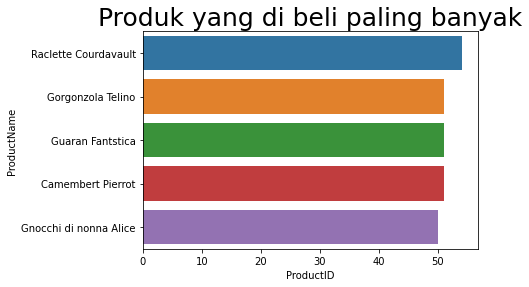

In [12]:
sns.barplot(x = Produkpalinglaku['ProductID'], y = Produkpalinglaku['ProductName'])
plt.title ('Produk yang di beli paling banyak', size = 25)
plt.show()

Setelah melihat hasil, Ternyata produk yang paling banyak di beli adalah produk :
1. Raclette Courdavault
2. Gorgonzola Telino
3. Guaran Fantstica
4. Camembert Pierrot
5. Gnocchi di nonna Alice

Ternyata dari hasil tersebut Keju dan Pasta lah yang lebih banyak di minati oleh pembeli, wajar saja karena budaya Barat lebih terbiasa atau lebih suka memakan keju dan pasta karena sudah menjadi makanan sehari hari.

# **SHIPCOUNTRY TERBANYAK**

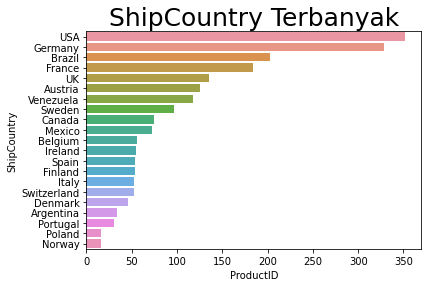

In [13]:
sns.barplot(x = Shipcountryterbanyak['ProductID'], y = Shipcountryterbanyak['ShipCountry'])
plt.title ('ShipCountry Terbanyak', size = 25)
plt.show()

Dari hasil pengiriman produk, ShipCountry terbanyak masuk di negara :
USA : Dari segi warga USA banyak pembeli di karenakan penduduk USA memiliki penduduk lebih banyak dari negara yang ada di list tersebut.
German : Warga German itu makanan tradisionalnya adalah Keju dan Pasta, maka lebih banyak peminat yang membeli.
Brazil : Penduduk Brazil rata rata penduduknya dalam sehari hari memakan keju.
France : Di France rata rata penduduknya dalam sehari hari memakan keju.
UK : di UK juga sama, selera masyarakat nya suka dengan Keju.

Kesimpulannya dari 5 negara tersebut :
Keberadaan Keju dan Pasta ada kewajiban untuk masyarakat mereka untuk di makan.
Seperti halnya di Indonesia Nasi.